In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Seaborn - Intro
# import seaborn as sns

### Notes
Seaborn Gallery(https://seaborn.pydata.org/examples/index.html)

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. Here's why you might use Seaborn over matplotlib:

- Simplified Syntax: Less code for complex visualizations.
- Built-in Themes: Predefined styles for attractive plots.
- Better Color Handling: Advanced palette options and usage.
- Statistical Plotting: Supports advanced plots like violin and box plots.
- Data Frames Support: Direct plotting from pandas data structures.
- Automatic Estimation: Built-in linear regression plotting.
- Faceting: Easy creation of multi-plot grids for data comparison.

Why learn another library?

If I wanted to take the chart from the end of the last lesson and color it so that the higher paying skills are in a more constrated color to draw our eyes to it, it would be super difficult to do this with mathplotlib.

But, with changing only a few lines of code, this could be implemented in Seaborn, and it would allow us to color graphs a lot easier. The real power of seaborn is unlocked when we get into more advanced visulizations

## Install and Import Seaborn

In [2]:
import seaborn as sns

In [3]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

## Bar Plots

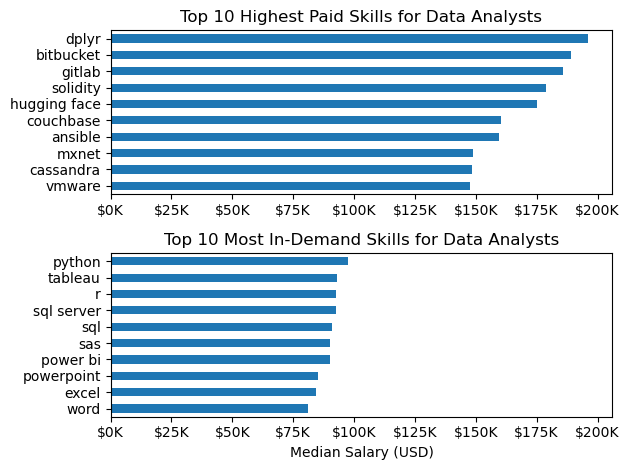

In [5]:
#Original Code:

df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)


fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

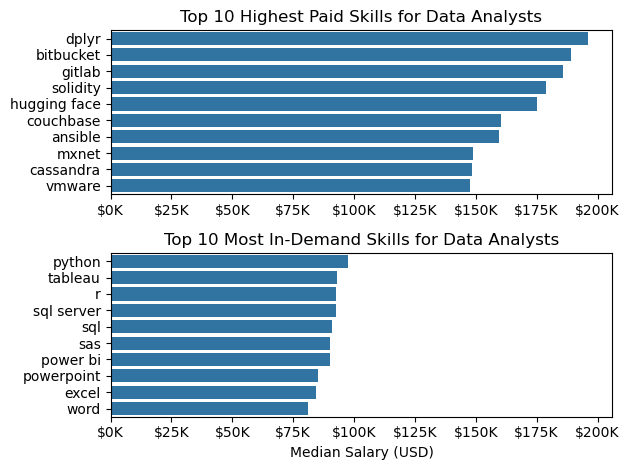

In [8]:
#Altered with Seaborn

#Commented out
    #df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
    #df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
#The rest can stay

#Luke loves Seaborn more than Matplotlib because we can specify hue
    #Hue allows us to specify a column to color by, so we can have a gradiant
#In this case, we will speacify the hue of the salary
    #So if there is a higher salary, it can have a darker color while a lower salary has a lighter color
#To determine what color to use, we will define this under the palette parameter, provided via string

fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0])


#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))



# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1])


#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

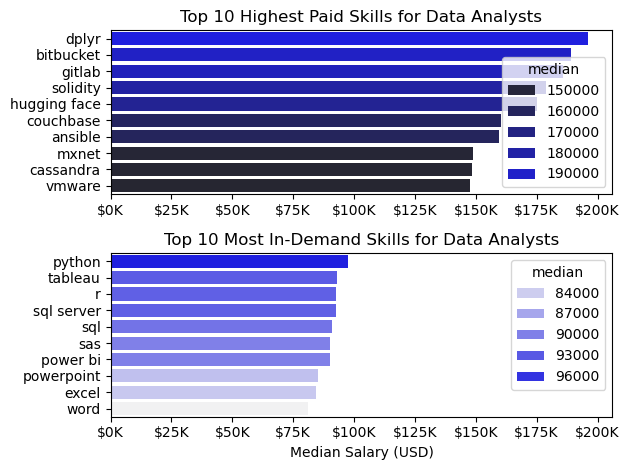

In [10]:
#Altered with Seaborn

#We need to get into coloring it

#Seaborn color palette choiced:
    #Sequential - as it gets from high to low, we want to color it in a gradient format
    #Diverging - similar to sequential, but it will go from one color to another vice a light color to a hot
    #Qualitative - a separate, individual color for each skill
        #We want the color to be associated with the salary itsself, so we won't use qualitative in this case

#We going to provide the hue value, which bascically says what column we need to look at in order to color off of
#Now that we specified what we're coloring off of, we need a color palette to choose from

fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b') #b means blue


#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))



# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b') #b means blue


#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

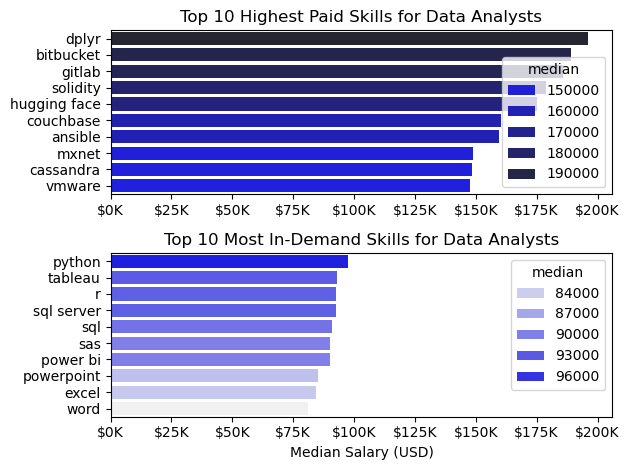

In [11]:
#We want it dark at the top to draw your eyes immeditately to it and for them to basically to be associated

fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r') #_r to reverse the coloring


#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))



# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b') #b means blue


#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

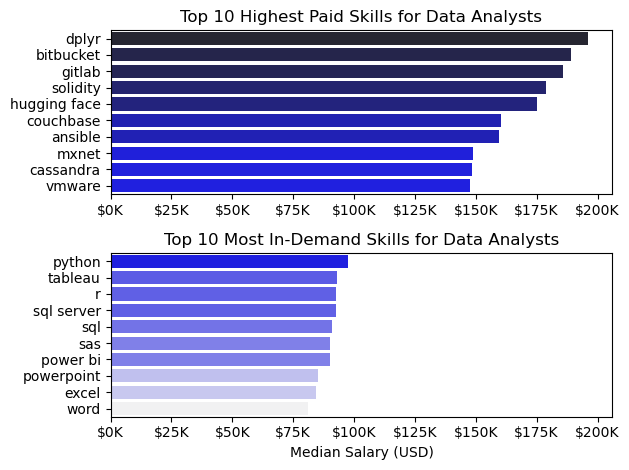

In [12]:
#Removing the legend

fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r') #_r to reverse the coloring


#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()


# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b') #b means blue


#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()


plt.tight_layout()
plt.show()

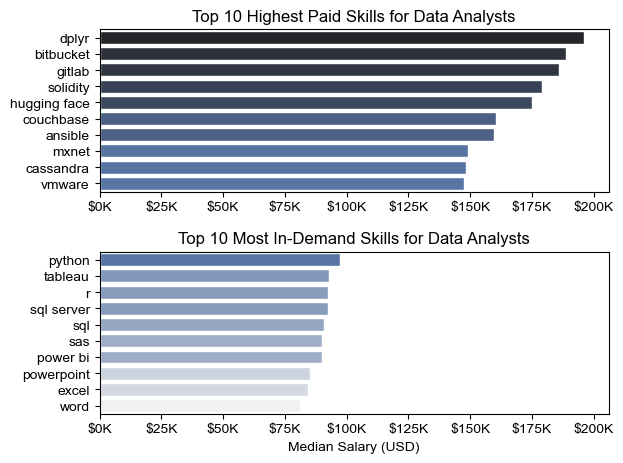

In [13]:
#Now, we can actually alter the themes of the graph itsself
#We can change up the backgrounds and even hoe light or dark the different colors are and how the axes are
#Bascically by specifying set themes and then from there specifying a style

fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')


# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r') #_r to reverse the coloring


#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()


# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b') #b means blue


#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()


plt.tight_layout()
plt.show()

## Histograms

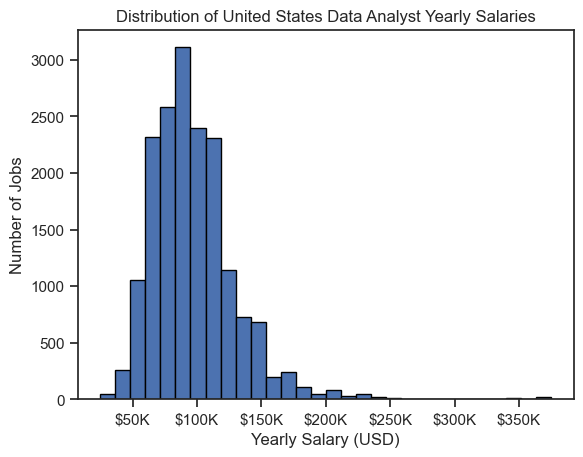

In [15]:
#Original

df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

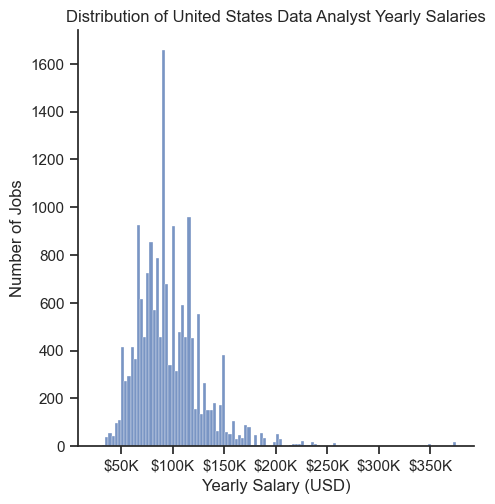

In [17]:
#Alter it using Seaborn
#Can't get smoth curves with .hisplot, but we can with 
#For Seaborn.displot(), we can provide pandas.DataFrame, numpy.ndarray, mapping, or sequence
#In this case, we are going to provide the column of salary year avg, so all the data is going to be include when we provide this.
    #So we dont need to worry about providing an x or a y
#The other thing we need to specufy is kind. There are three differnt types we can use. We will use kde.


sns.displot(df_DA_US['salary_year_avg'])
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

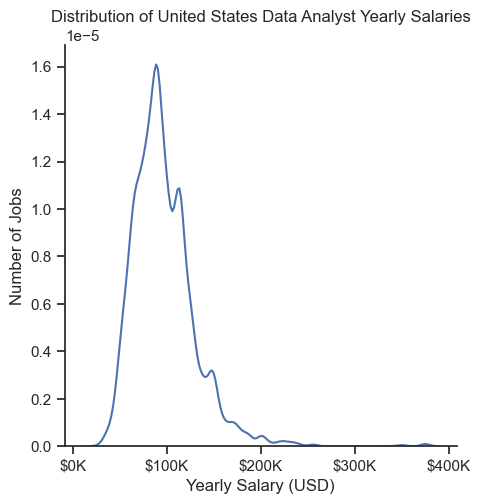

In [18]:
#We want it a bit smother, so we will use kde or kerneldensity estimation
sns.displot(df_DA_US['salary_year_avg'], kind='kde')
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

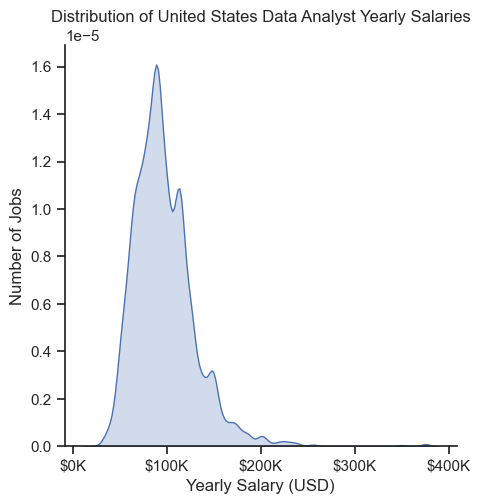

In [19]:
#This an outline. We can fill it in 
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

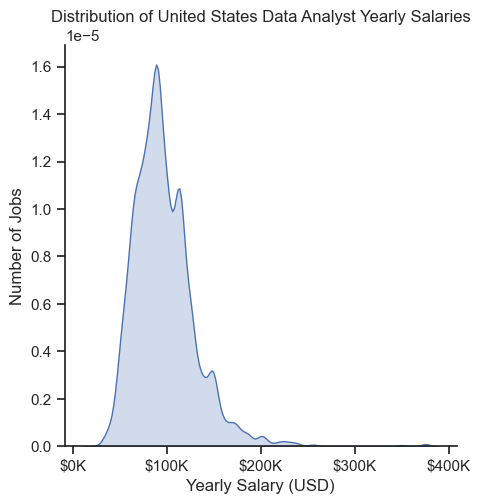

In [20]:
#If we wanted to set the theme again using ticks, nothing will change because we have already implemented inside the environement
#If we wanted to change, we could, but it is already set in the environmet

sns.set_theme(style='ticks')
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Number of Jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()

## Box Plots

C:\Users\zamia\AppData\Local\Temp\ipykernel_48408\2192350482.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


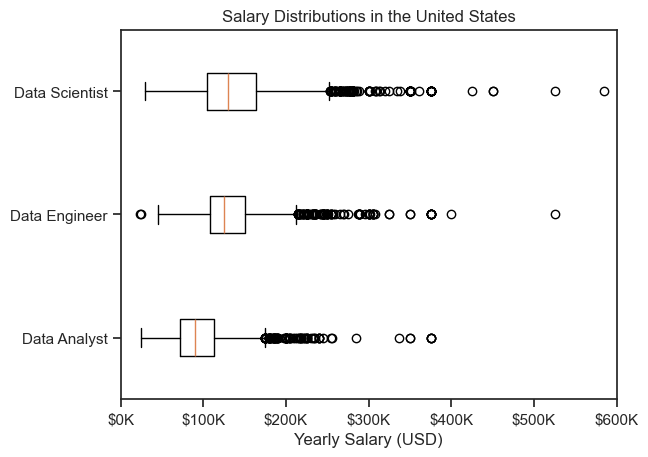

In [21]:
#Original Code
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter for the job titles and country
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

# list of salaries for each job title
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

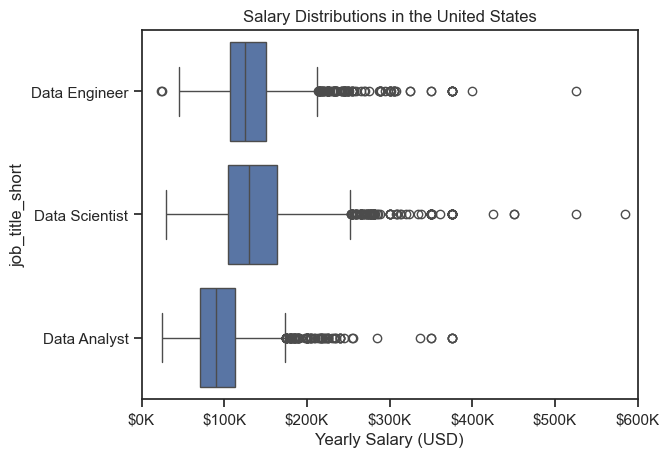

In [22]:
#Using Seaborn

#With ploting box plots in Seaborn, this is where we start to get slightly different syntax then we used in Matplotlib
#Previously, we specified the data as inly a series of values for the salary year average
#But, in this case, we need to provide x and also y values for this
#For, our date, we will just provide the name of the dataframe
#For x and y, we'll just provide the column names, adn we'll know to use that data frame in order to access those columns
#This si pretty cool because we can minimize the amount of code we write for this

sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')


plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

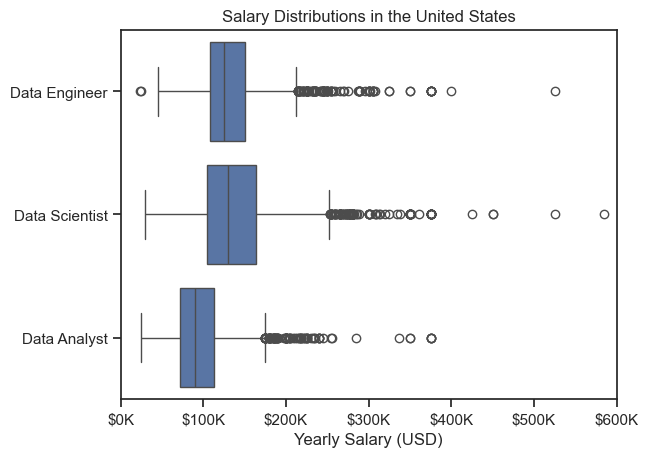

In [24]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')


plt.title('Salary Distributions in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

___

## Course Practice Problems

Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.

(2.20.1)

    Use sns.barplot() to create the bar plot and sort the companies by median salary.

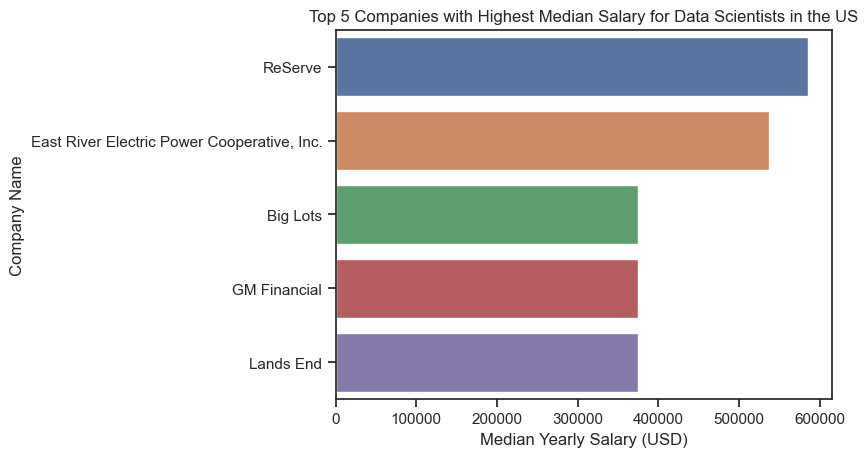

In [42]:
df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()
top_5_companies = df_ds_us.groupby('company_name')['salary_year_avg'].median().sort_values(ascending=False).head().reset_index()


sns.barplot(data=top_5_companies, x='salary_year_avg', y='company_name', hue='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

In [38]:
df_ds_us.groupby('company_name')['salary_year_avg'].median().sort_values(ascending=False).head().reset_index()

,company_name,salary_year_avg
0,ReServe,585000.0
1,"East River Electric Power Cooperative, Inc.",537000.0
2,Big Lots,375000.0
3,GM Financial,375000.0
4,Lands End,375000.0


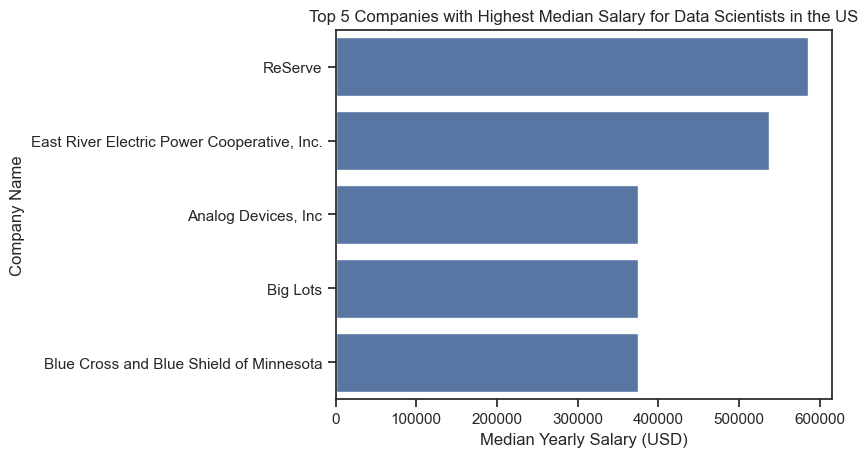

In [44]:
#Course Solution:
#Course chart was colorfuly light mine above. Maybe hue was accidently left out of the code.
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
top_companies = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()

Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

- Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
- Use 25 bins for the histogram and set the x-axis limit to 700,000.
- Set the title to 'Distribution of Yearly Salaries for Data Scientist in the United States' and label the y-axis 'Number of Jobs' and x-axis 'Yearly Salary (USD)'.

(2.20.2)

    Use the sns.histplot() function to create the histogram and filter the DataFrame using boolean indexing.

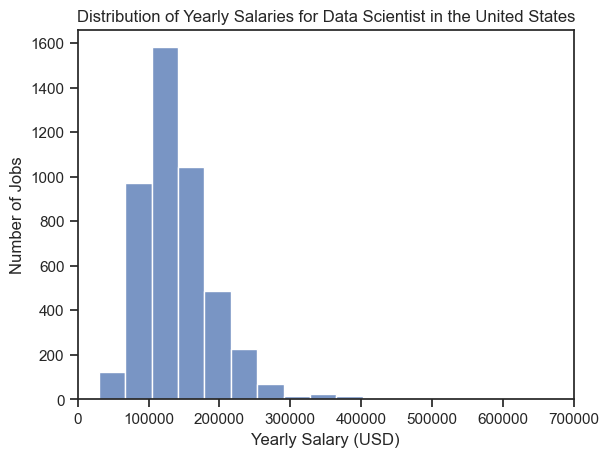

In [48]:
df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()
sns.histplot(df_ds_us['salary_year_avg'], bins=25) 
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.xlim(0,700000)
plt.ylabel('Number of Jobs')
plt.show()

Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:

- Filter the DataFrame to include only job postings in India and remove any entries with missing yearly salary values.
- Set the x-axis limit to 300,000 and format it as $100k.
- Set the title to 'Yearly Salary Comparison for Data Roles in India' and label the x-axis as 'Yearly Salary (USD)'.

Code Needed:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

(2.20.3) 

    Use the sns.boxplot() function to visualize the salary distributions and format the x-axis labels to reflect thousands as 'k' using plt.FuncFormatter.

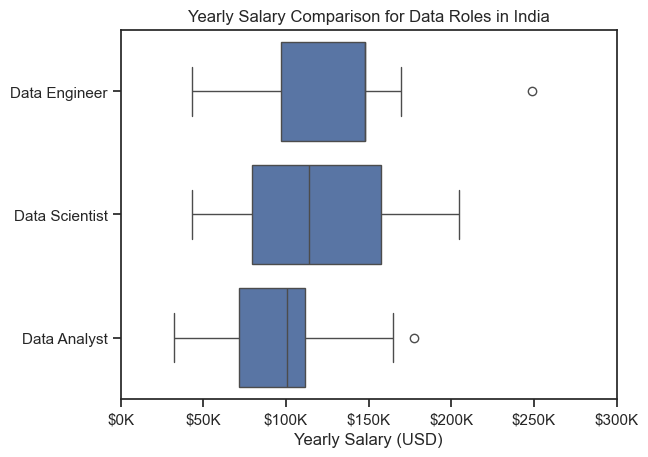

In [53]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_data_jobs_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset=['salary_year_avg']).copy()

job_list = [df_data_jobs_IN[df_data_jobs_IN['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


sns.boxplot(data=df_data_jobs_IN, x='salary_year_avg', y='job_title_short')
sns.set_theme(style='ticks')


plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000) 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

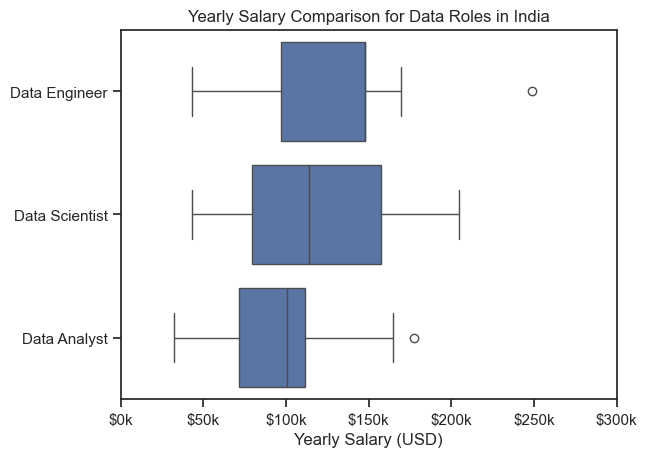

In [55]:
#Course Solution
#It appears that I did not need to use the job list for my code.

# Filter for Data Analyst, Data Engineer, and Data Scientist job postings in India
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
india_jobs = df[(df['job_country'] == 'India') & (df['job_title_short'].isin(job_titles))]

# Drop NaN values from the 'salary_year_avg' column
india_jobs = india_jobs.dropna(subset=['salary_year_avg'])

# Plot box plot for yearly average salary
sns.boxplot(data=india_jobs, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

- Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
- Ensure the plot includes a title, axis labels, and custom formatting for the salary axis.

(2.20.4)

    - Use sns.violinplot() with the x parameter set to job_country and the y parameter set to salary_year_avg.
    - Utilize plt.ylim() and plt.gca().yaxis.set_major_formatter() to set and format the salary axis.

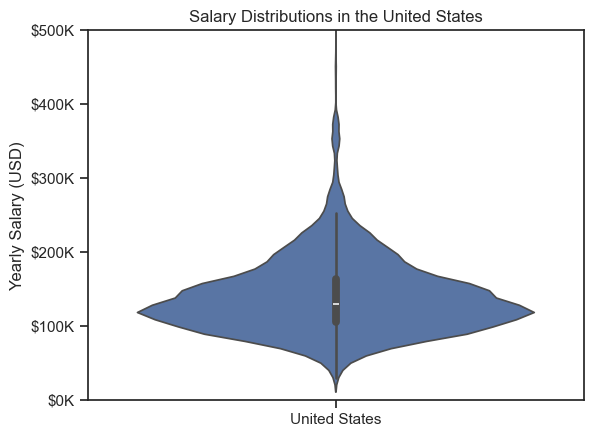

In [63]:
df_ds_us = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset=['salary_year_avg']).copy()

sns.violinplot(data=df_ds_us, x='job_country', y='salary_year_avg')

plt.title('Salary Distributions in the United States')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 500000) 
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()